In [35]:
import pandas as pd
import pylab as pl



T=pd.read_csv(r'C:\Users\julia\Documents\python36\datasource\data\revenus_departements.csv')
T.head()

,Dept,Num,Foyers,Mas_rev
0,01,1,59835,259963
1,01,2,17456,192835
2,01,3,30274,412589
3,01,4,55137,959378
4,01,5,62323,1531856


# Repartition in 77

In [2]:
D=T.query('Dept=="77"').copy()
D

,Dept,Num,Foyers,Mas_rev
600,77,1,138581,560700
601,77,2,34653,382292
602,77,3,61363,835814
603,77,4,120243,2099717
604,77,5,154946,3798066
605,77,6,152802,5907798
606,77,7,92481,6033278
607,77,8,14107,2425818


In [13]:
D=D.shift()
D=D.reset_index(drop=True)
D.loc[0, :] = ['', '', 0, 0]
D

,Dept,Num,Foyers,Mas_rev
0,,,0.0,0.0
1,77,1.0,138581.0,560700.0
2,77,2.0,34653.0,382292.0
3,77,3.0,61363.0,835814.0
4,77,4.0,120243.0,2099717.0
5,77,5.0,154946.0,3798066.0
6,77,6.0,152802.0,5907798.0
7,77,7.0,92481.0,6033278.0


# Cumulated 

In [21]:
D['ECC_f'] = D['Foyers'].cumsum()
D

,Dept,Num,Foyers,Mas_rev,ECC_r,ECC_f
0,,,0.0,0.0,0.0,0.0
1,77,1.0,138581.0,560700.0,560700.0,138581.0
2,77,2.0,34653.0,382292.0,942992.0,173234.0
3,77,3.0,61363.0,835814.0,1778806.0,234597.0
4,77,4.0,120243.0,2099717.0,3878523.0,354840.0
5,77,5.0,154946.0,3798066.0,7676589.0,509786.0
6,77,6.0,152802.0,5907798.0,13584387.0,662588.0
7,77,7.0,92481.0,6033278.0,19617665.0,755069.0


In [22]:
D['ECC_r']=D['Mas_rev'].cumsum()
D

,Dept,Num,Foyers,Mas_rev,ECC_r,ECC_f
0,,,0.0,0.0,0.0,0.0
1,77,1.0,138581.0,560700.0,560700.0,138581.0
2,77,2.0,34653.0,382292.0,942992.0,173234.0
3,77,3.0,61363.0,835814.0,1778806.0,234597.0
4,77,4.0,120243.0,2099717.0,3878523.0,354840.0
5,77,5.0,154946.0,3798066.0,7676589.0,509786.0
6,77,6.0,152802.0,5907798.0,13584387.0,662588.0
7,77,7.0,92481.0,6033278.0,19617665.0,755069.0


In [15]:
Revenus_moyen = D['Mas_rev'] / D['Foyers']
Revenus_moyen

0          NaN
1     4.046009
2    11.032003
3    13.620814
4    17.462281
5    24.512191
6    38.663093
7    65.238027
dtype: float64

# Frequency

In [16]:
F = D['Foyers'].sum()
F

755069.0

In [24]:
R = D['Mas_rev'].sum()
R

19617665.0

In [31]:
D['FCC_f'] = D['ECC_f'] / F
D['FCC_r'] = D['ECC_r'] / R
D

,Dept,Num,Foyers,Mas_rev,ECC_r,ECC_f,FCC_f,FCC_r
0,,,0.0,0.0,0.0,0.0,0.000000,0.000000
1,77,1.0,138581.0,560700.0,560700.0,138581.0,0.183534,0.028581
2,77,2.0,34653.0,382292.0,942992.0,173234.0,0.229428,0.048069
3,77,3.0,61363.0,835814.0,1778806.0,234597.0,0.310696,0.090674
4,77,4.0,120243.0,2099717.0,3878523.0,354840.0,0.469944,0.197706
5,77,5.0,154946.0,3798066.0,7676589.0,509786.0,0.675152,0.391310
6,77,6.0,152802.0,5907798.0,13584387.0,662588.0,0.877520,0.692457
7,77,7.0,92481.0,6033278.0,19617665.0,755069.0,1.000000,1.000000


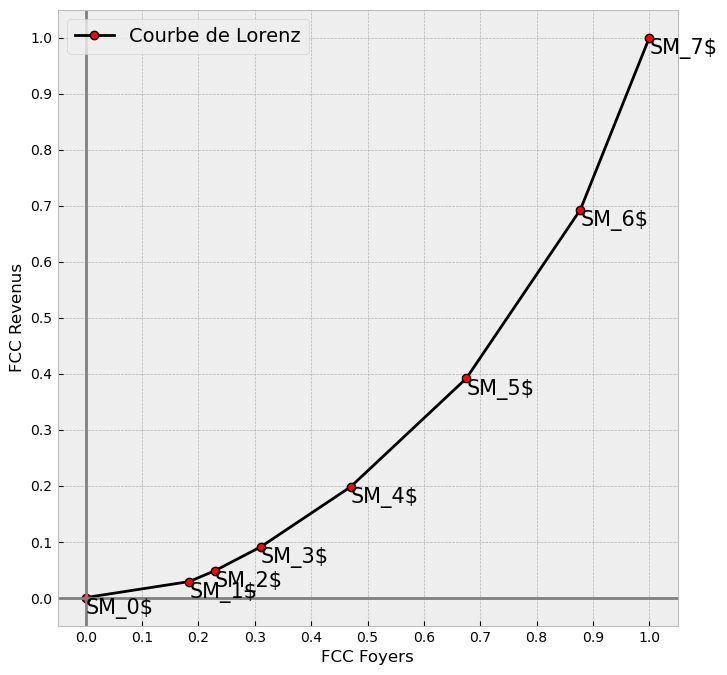

In [33]:
import pylab as pl 
pl.style.use ("bmh")

D.plot(x ='FCC_f', y = 'FCC_r',

        marker ='o',

        markerfacecolor = 'red',

        color = 'black',
        
        label = 'Courbe de Lorenz',
        
        xticks = [k/100 for k in range (0, 110, 10)],

        yticks = [k/100 for k in range (0, 110, 10)],

        grid = True, figsize = (8, 8))


for k in range (8):

    pl.text (D. loc [k, 'FCC_f'], D. loc[k, 'FCC_r'],
        r'SM_'+str(k)+'$',
        va = 'top', ha = 'left',
        fontsize = 15)

pl.xlabel('FCC Foyers')
pl.ylabel('FCC Revenus')
pl.legend(loc = 'upper left', fontsize = 14)
pl.axhline (y = 0, color = 'gray')
pl.axvline (x = 0, color = 'gray')